In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
corr = pd.read_csv("./data/corr_matrix.csv")

## Clustering Correlation Coefficients

In [3]:
block_names = list(corr.columns)
corr_matrix = corr.to_numpy(dtype=float)

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(corr_matrix)
clusters = kmeans.predict(corr_matrix)
print(clusters)

[0 1 1 1 0 3 1 0 1 2 3 0]


In [5]:
cluster_names = {0: [],
                 1: [],
                 2: [],
                 3: [],}

for i in range(len(clusters)):
    index = clusters[i]
    cluster_names[index].append(block_names[i])
  
print(cluster_names)

{0: ['11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST', '6TH AVE N BETWEEN JOHN ST AND THOMAS ST', 'EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST', 'ROY ST BETWEEN FAIRVIEW AVE N AND MINOR AVE N'], 1: ['15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST', '1ST AVE BETWEEN BELL ST AND BATTERY ST', '2ND AVE BETWEEN LENORA ST AND BLANCHARD ST', 'BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST', 'FAIRVIEW AVE N BETWEEN JOHN ST AND THOMAS ST'], 2: ['FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND ALOHA ST'], 3: ['7TH AVE BETWEEN OLIVE WAY AND STEWART ST', 'MINOR AVE BETWEEN HOWELL ST AND STEWART ST']}


In [6]:
pca_2d = PCA(n_components=2)
pc = pca_2d.fit_transform(corr_matrix)

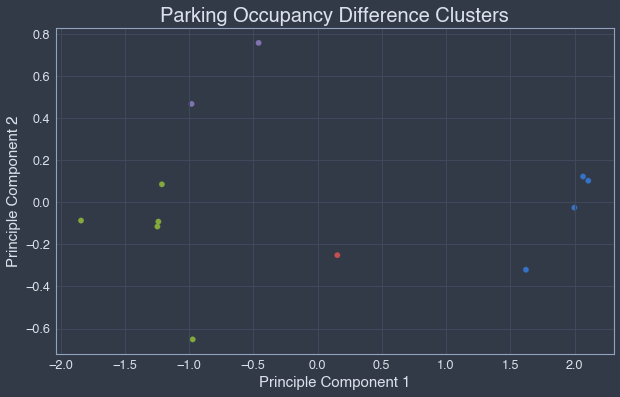

In [7]:
colors = ['b', 'g', 'r', 'm']
color_map = [colors[i] for i in clusters]

plt.figure(figsize=(10,6))
plt.scatter(pc[:,0], pc[:,1], color=color_map)
plt.title("Parking Occupancy Difference Clusters", fontsize=20)
plt.ylabel("Principle Component 2", fontsize=15)
plt.xlabel("Principle Component 1", fontsize=15)
plt.show()